## Dataset Processing

Notebook to process data and store on disk such that it can be directly read for model training.

In [2]:
import sys
sys.path.append('..') # append code directory to path

import os
from pathlib import Path
import re
import shutil
from tqdm import tqdm

import numpy as np
import pandas as pd
from pydub import AudioSegment
from scipy.io.wavfile import read as wavread
from scipy.io.wavfile import write as wavwrite
import matplotlib.pyplot as plt
import seaborn as sns

from utils.generic import *

import IPython.display as ipd

In [3]:
data_dir = Path.home() / 'data'

In [ ]:
ecog_path = '/home/passch/data/HP1_EEG_conditional/denoised_fixed-transcript_cleaned'
ecog_files = get_files_in_dir(ecog_path, 'npy')
print(len(ecog_files))
words = [get_word_from_filepath(file) for file in files]
# for count in range(1,13):
#     print(count, ':', end=" ")
#     print([word for word in np.unique(files) if files.count(word) == count])
word_counts = {word: words.count(word) for word in np.unique(words)}

In [21]:
word_counts_large = dict(filter(lambda item: item[1] >= 6, word_counts.items()))
word_counts_to_take = {k: v-5 for k,v in word_counts_large.items()}
word_counts_to_take

{}

In [18]:
ecog_files = [file.split('/')[-1] for file in ecog_files]

# for word, count in word_counts_to_take.items():
#     for file in ecog_files:
        

In [6]:
# vp = '/home/passch/data/VariaNTS/VariaNTS_words_16kHz_HP_synth_sameval_aug'

# vnts_files = get_files_in_dir(vp, filetype='wav')

In [16]:
with open('/home/passch/data/datasplits/HP1_EEG_conditional/denoised_fixed-transcript_cleaned/train.csv', 'w') as f:
    f.write(','.join(ecog_files))

#### Remove the words from VariaNTS val

In [24]:
ecog_val_words = ['dag', 'hoofd', 'keer', 'paar', 'wel']

p = '/home/passch/data/datasplits/VariaNTS/HP_synth_sameval_aug_cleaned_90-10/val.csv'
with open(p, 'r') as f:
    vnts_files = f.read().split(',')

vnts_files = [file for file in vnts_files if get_word_from_filepath(file) in ecog_val_words]
# for file in vnts_files:
#     if get_word_from_filepath(file) in ecog_val_words:

op = '/home/passch/data/datasplits/VariaNTS/HP_synth_sameval_aug_cleaned_90-10_brain-cc-finetuning/val.csv'
with open(op, 'w') as f:
    f.write(','.join(vnts_files))

## Plots for poster

In [ ]:
import seaborn as sns

In [3]:
df = pd.read_csv(data_dir / 'df_VariaNTS_words.csv')
df.head()

,path,person,type,word,sample_rate,length,duration,dBFS,max_dBFS
0,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,rijm,44100,24897.0,0.564558,-28.98248,-16.388864
1,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,loop,44100,26908.0,0.610159,-28.98248,-14.074818
2,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,laat,44100,29740.0,0.674376,-28.98248,-12.449308
3,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,reis,44100,26362.0,0.597778,-28.98248,-14.399741
4,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,duur,44100,18732.0,0.424762,-28.98248,-19.909815


[]

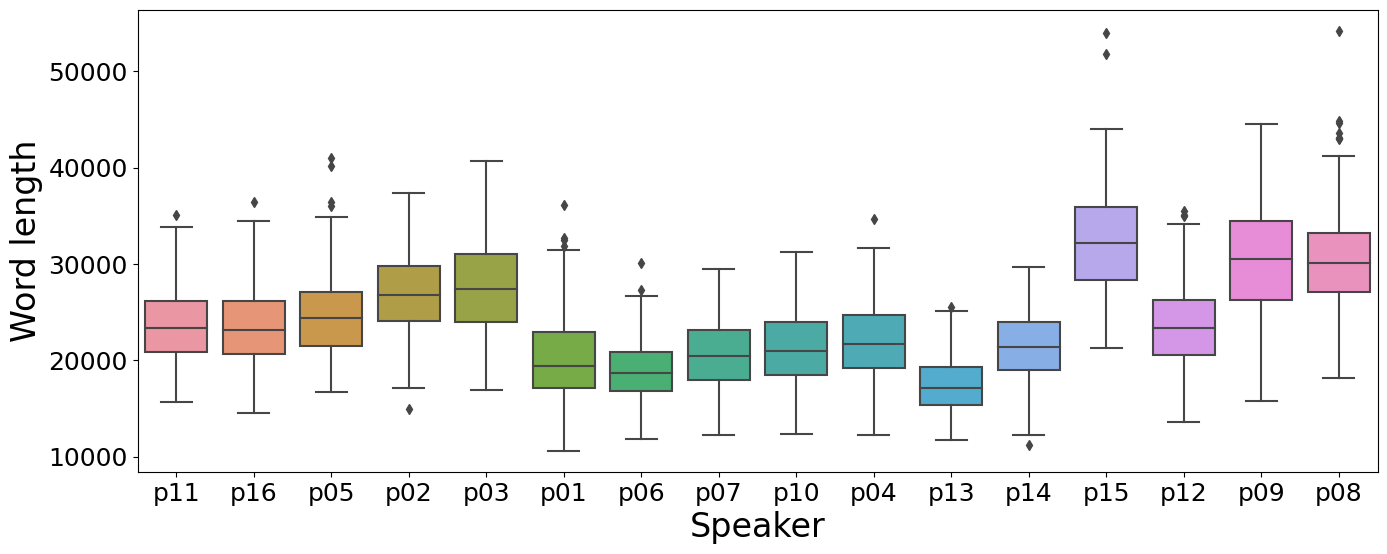

In [28]:
plt.figure(figsize=(16,6))
# plt.suptitle('Distribution of word lengths per speaker')
sns.boxplot(data=df, x='person', y='length')
plt.xlabel('Speaker', fontdict={'size':24})
plt.ylabel('Word length', fontdict={'size':24})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# sns.boxplot(data=df, x='word', y='length')
plt.plot()

In [30]:
df_metrics = pd.read_csv('VariaNTS-v3_val+train-log-loss.csv')
df_metrics.head()

,Step,VariaNTSWords-v3 - val/log_loss,VariaNTSWords-v3 - val/log_loss__MIN,VariaNTSWords-v3 - val/log_loss__MAX,VariaNTSWords-v3 - train/log_loss,VariaNTSWords-v3 - train/log_loss__MIN,VariaNTSWords-v3 - train/log_loss__MAX
0,0,NaN,NaN,NaN,-0.532567,-0.532567,-0.532567
1,1,NaN,NaN,NaN,-1.444906,-1.444906,-1.444906
2,2,NaN,NaN,NaN,-1.852083,-1.852083,-1.852083
3,3,NaN,NaN,NaN,-2.407301,-2.407301,-2.407301
4,5,-2.556205,-2.556205,-2.556205,NaN,NaN,NaN


[]

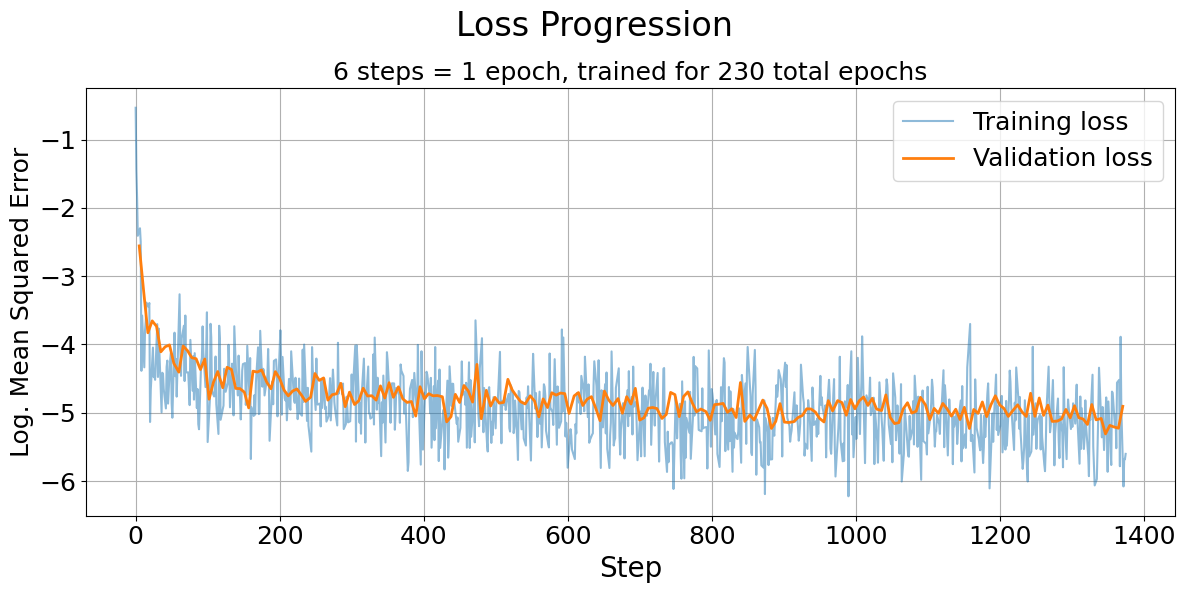

In [140]:
plt.figure(figsize=(12,6))
plt.suptitle('Loss Progression', size=24)
plt.title('6 steps = 1 epoch, trained for 230 total epochs', size=18)

plt.xlabel('Step', fontdict={'size':20})
plt.ylabel('Log. Mean Squared Error', fontdict={'size':18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

sns.lineplot(data=df_metrics, x='Step', y= 'VariaNTSWords-v3 - train/log_loss', label='Training loss', alpha=0.5)
sns.lineplot(data=df_metrics, x='Step', y= 'VariaNTSWords-v3 - val/log_loss', label='Validation loss', linewidth=2)

plt.legend(fontsize=18)
plt.tight_layout()
plt.grid()
plt.plot()

In [129]:
df_metrics.Step.values[-1]

1375

In [131]:
6 * 230

1380

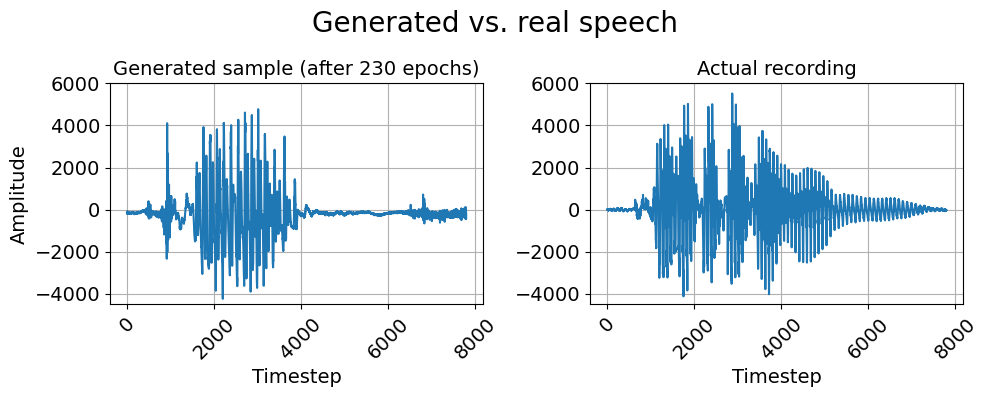

In [142]:
freq_samples, signal = wavread('/home/passch/generated_wav/DiffWave_VariaNTS_v3/audio_1340_bde324c047104f402038.wav')
freq_sample2, signal2 = wavread('/home/passch/data/VariaNTS_words_16kHz/p08/p08_words/bron.wav')

plt.figure(figsize=(10,4))
plt.suptitle('Generated vs. real speech', size=20)

plt.subplot(121)
plt.title('Generated sample (after 230 epochs)', fontdict={'size': 14})
plt.plot(signal[:7794])
plt.xlabel('Timestep', fontdict={'size':14})
plt.ylabel('Amplitude', fontdict={'size':14})
plt.ylim(-4500,6000)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.grid()

plt.subplot(122)
plt.title('Actual recording', fontdict={'size': 14})
plt.plot(signal2)
plt.xlabel('Timestep', fontdict={'size':14})
plt.ylim(-4500,6000)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.grid()

plt.tight_layout()
plt.show()

In [70]:
len(signal2)

7794

## Plots for thesis

In [9]:
columns = ["Threshold", "Classes", "Accuracy", "Set"]
perf_without_undersampling = [
    (1, 53, 1.0, "Train"),(1, 53, 0.1117, "Test"),
    (2, 34, 1.0, "Train"),(2, 34, 0.1243, "Test"),
    (3, 23, 1.0, "Train"),(3, 23, 0.1429, "Test"),
    (4, 19, 1.0, "Train"),(4, 19, 0.1556, "Test"),
    (5, 15, 1.0, "Train"),(5, 15, 0.1765, "Test"),
    (6, 12, 1.0, "Train"),(6, 12, 0.2019, "Test"),
    (7, 10, 1.0, "Train"),(7, 10, 0.2283, "Test"),
    (8,  6, 1.0, "Train"),(8,  6, 0.3281, "Test"),
    (9,  3, 1.0, "Train"),(9,  3, 0.575, "Test"),
    (10, 2, 1.0, "Train"),(10, 2, 0.7419, "Test"),
]

perf_with_undersampling = [
    (1, 53, 1.0, "Train"),(1, 53, 0.0, "Test"),
    (2, 34, 1.0, "Train"),(2, 34, 0.0, "Test"),
    (3, 23, 1.0, "Train"),(3, 23, 0.0, "Test"),
    (4, 19, 1.0, "Train"),(4, 19, 0.0395, "Test"),
    (5, 15, 1.0, "Train"),(5, 15, 0.08, "Test"),
    (6, 12, 1.0, "Train"),(6, 12, 0.0417, "Test"),
    (7, 10, 1.0, "Train"),(7, 10, 0.0571, "Test"),
    (8,  6, 1.0, "Train"),(8,  6, 0.2917, "Test"),
    (9,  3, 1.0, "Train"),(9,  3, 0.4444, "Test"),
    (13, 2, 1.0, "Train"),(13, 2, 0.6538, "Test"),
]

In [10]:
df_no_undersampling = pd.DataFrame(columns=columns, data=perf_without_undersampling)
df_no_undersampling.head()
df_undersampling = pd.DataFrame(columns=columns, data=perf_with_undersampling)
df_undersampling.head()

,Threshold,Classes,Accuracy,Set
0,1,53,1.0,Train
1,1,53,0.0,Test
2,2,34,1.0,Train
3,2,34,0.0,Test
4,3,23,1.0,Train


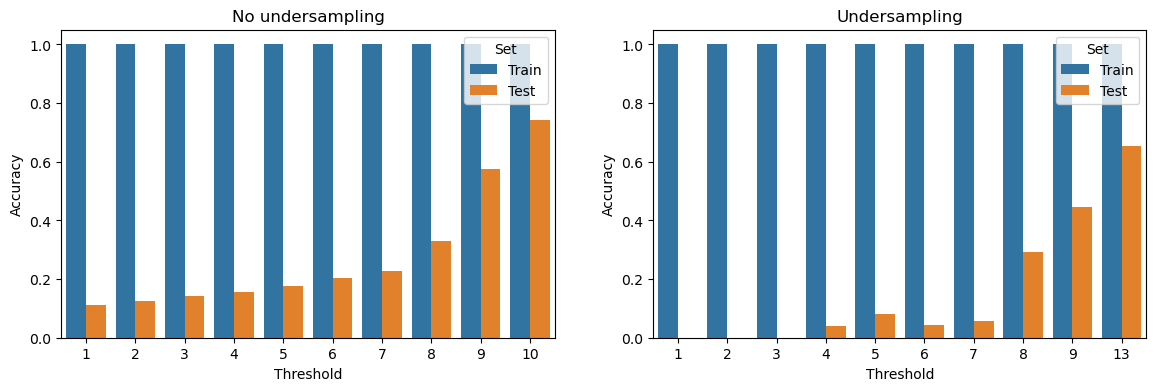

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.title("No undersampling")
sns.barplot(data=df_no_undersampling, x="Threshold", y="Accuracy", hue="Set")

plt.subplot(122)
plt.title("Undersampling")
sns.barplot(data=df_undersampling, x="Threshold", y="Accuracy", hue="Set")

plt.show()

In [25]:
columns = ["Threshold", "Classes", "Accuracy", "Set", "Undersampling"]
perf_data = [
    (1, 53, 1.0, "Train", "False"),(1, 53, 0.1117, "Test", "False"),
    (2, 34, 1.0, "Train", "False"),(2, 34, 0.1243, "Test", "False"),
    (3, 23, 1.0, "Train", "False"),(3, 23, 0.1429, "Test", "False"),
    (4, 19, 1.0, "Train", "False"),(4, 19, 0.1556, "Test", "False"),
    (5, 15, 1.0, "Train", "False"),(5, 15, 0.1765, "Test", "False"),
    (6, 12, 1.0, "Train", "False"),(6, 12, 0.2019, "Test", "False"),
    (7, 10, 1.0, "Train", "False"),(7, 10, 0.2283, "Test", "False"),
    (8,  6, 1.0, "Train", "False"),(8,  6, 0.3281, "Test", "False"),
    (9,  3, 1.0, "Train", "False"),(9,  3, 0.575, "Test", "False"),
    (10, 2, 1.0, "Train", "False"),(10, 2, 0.7419, "Test", "False"),
    (1, 53, 1.0, "Train", "True"),(1, 53, 0.0, "Test", "True"),
    (2, 34, 1.0, "Train", "True"),(2, 34, 0.0, "Test", "True"),
    (3, 23, 1.0, "Train", "True"),(3, 23, 0.0, "Test", "True"),
    (4, 19, 1.0, "Train", "True"),(4, 19, 0.0395, "Test", "True"),
    (5, 15, 1.0, "Train", "True"),(5, 15, 0.08, "Test", "True"),
    (6, 12, 1.0, "Train", "True"),(6, 12, 0.0417, "Test", "True"),
    (7, 10, 1.0, "Train", "True"),(7, 10, 0.0571, "Test", "True"),
    (8,  6, 1.0, "Train", "True"),(8,  6, 0.2917, "Test", "True"),
    (9,  3, 1.0, "Train", "True"),(9,  3, 0.4444, "Test", "True"),
    (13, 2, 1.0, "Train", "True"),(13, 2, 0.6538, "Test", "True"),
]

In [26]:
df = pd.DataFrame(columns=columns, data=perf_data)
df.head()

,Threshold,Classes,Accuracy,Set,Undersampling
0,1,53,1.0000,Train,False
1,1,53,0.1117,Test,False
2,2,34,1.0000,Train,False
3,2,34,0.1243,Test,False
4,3,23,1.0000,Train,False


In [1]:
plt.title("Test accuracy for different no. of classes")
sns.barplot(data=df[df.Set == "Test"], x="Classes", y="Accuracy", hue="Undersampling")
plt.show()

NameError: name 'plt' is not defined

## Split VariaNTS words into train, val, and test set

In [8]:
output_dir = data_dir / 'datasplits'

Define helper functions that we will use later:

In [7]:
def get_paths_from_df(chosen_words, data_frame, drop_base_path=True):
    files = []
    for w in chosen_words:
        files.extend(data_frame[data_frame.word == w].path.values)
    if drop_base_path:
        files = ['/'.join(fn.split('/')[-3:]) for fn in files]
    return files

In [42]:
def write_csv(files, output_name):
    with open(output_dir / output_name, 'w') as file:
        # Notice that we write the last file without a comma. If we don't do that, 
        # reading it later might cause an empty string to be read.
        for fn in files[:-1]:
            file.write(f'{fn},')
        file.write(files[-1])

In [ ]:
def read_csv(file_name):
    with open(output_dir / file_name, 'r') as file:
        return file.readline().split(',')

In the following, we load the VariaNTS dataframe from csv, that only includes 'word' type words:

In [10]:
df = pd.read_csv('../data/df_VariaNTS_words.csv')
df.head()

,path,person,type,word,sample_rate,length,duration,dBFS,max_dBFS
0,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,rijm,44100,24897.0,0.564558,-28.98248,-16.388864
1,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,loop,44100,26908.0,0.610159,-28.98248,-14.074818
2,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,laat,44100,29740.0,0.674376,-28.98248,-12.449308
3,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,reis,44100,26362.0,0.597778,-28.98248,-14.399741
4,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,duur,44100,18732.0,0.424762,-28.98248,-19.909815


There is a typo in the original data ('föhn' instead of 'fohn'). To make sure it is removed in the dataframe we use here, let's check the number of unique words and words that have counts other than 16. If the `assert` statements hold, we can proceed:

In [11]:
unique_words = np.unique(df.word)
n_words = len(unique_words)
print('No. of unique words:', n_words)
assert n_words == 300

word_counts = df.groupby('word').size().loc[lambda x : x != 16]
assert word_counts.empty

No. of unique words: 300


Now to the actual processing...

**Note** that we can select only a random subset of the data set by passing the `subset` parameter to `get_random_indexes`.

In [30]:
# Randomly select words for set splits
# train_idx, val_idx, test_idx = get_random_indexes(n_words, 0.92, 0.08, seed=1144)

rng = np.random.default_rng(1144)
rand_idx = rng.choice(n_words, size=n_words, replace=False)
train_idx, val_idx, test_idx = rand_idx[:280], rand_idx[280:], []

train_words = [unique_words[i] for i in train_idx]
val_words = [unique_words[i] for i in val_idx]
test_words = [unique_words[i] for i in test_idx]

len(train_words), len(val_words), len(test_words)

(280, 20, 0)

In [31]:
train_files = get_paths_from_df(train_words, df)
val_files = get_paths_from_df(val_words, df)
test_files = get_paths_from_df(test_words, df)

len(train_files), len(val_files), len(test_files)

(4480, 320, 0)

In [23]:
# Write the collected file names to .csv-files.
write_csv(train_files, 'train.csv')
if val_files:
    write_csv(val_files, 'val.csv')
if test_files:
    write_csv(test_files, 'test.csv')

### Create train, val, and test for the Harry Potter subclass of VariaNTS words

In [39]:
df_HP = pd.read_csv('../data/df_VariaNTS_HPCh1words.csv')
df_noHP = pd.read_csv('../data/df_VariaNTS_NotHPCh1words.csv')

We can directly write the train.csv file from the Harry Potter dataframe:

In [40]:
# Instead of directly using df_HP.path.values, we first get the unique words and
# then fetch them again from the df. This seems like an unnecessary extra step,
# but allows us to use the `drop_base` functionality of `get_paths_from_df` and
# causes the files to be sorted by word, not speaker.
train_files = get_paths_from_df(np.unique(df_HP.word.values), df_HP)
print('Train set size:', len(train_files))
write_csv(train_files, 'train.csv')

Train set size: 880


For validation and test we have to select some words randomly from the non-Harry Potter words:

In [77]:
# Get number of unique words
unique_words = np.unique(df_noHP.word)
n_words = len(unique_words)

# We can re-purpose the indexing function here, by using the would-be train and 
# val indexes as val and test indexes, respectively
val_idx, test_idx, _ = get_random_indexes(n_words, train_split=0.5, val_split=0.5, subset=0.1)

# Get actual words from the indexes
val_words = [unique_words[i] for i in val_idx]
test_words = [unique_words[i] for i in test_idx]

print('Unique words per set:',len(val_words), len(test_words))

# Gather the files from the dataframe (16 speakers per word)
val_files = get_paths_from_df(val_words, df_noHP)
test_files = get_paths_from_df(test_words, df_noHP)

print('Final set sizes:',len(val_files), len(test_files))

Unique words per set: 12 12
Final set sizes: 192 192


In [78]:
write_csv(val_files, 'val.csv')
write_csv(test_files, 'test.csv')

Now we also want to create a distinct fold that holds only the audio files corresponding to HP words. We can later combine this with the new synthetic speakers.

**NOTE**: We must be careful that the non-HP words dataframe does not contain the erroneous 'föhn' word or its path, since that is *only* present in the original data, and *not* in our processed versions (e.g. VariaNTS_words_16kHz)

In [42]:
source_dir = data_dir / 'VariaNTS_words_16kHz'
target_dir = data_dir / 'VariaNTS_words_16kHz_HP'

for subset in [train_files, val_files, test_files]:
    for fn in tqdm(subset):
        os.makedirs(target_dir / '/'.join(fn.split('/')[:2]), exist_ok=True)
        shutil.copy(source_dir / fn, target_dir / fn)

100%|██████████| 880/880 [00:04<00:00, 195.94it/s]


### Create train and val split for the HP + synthetic voices dataset

In [3]:
from collections import defaultdict

Let's first get the file paths for all audio files in the combined HP + synthetic voices dataset:

In [9]:
hp_synth_path = Path('/home/passch/data/VariaNTS_words_16kHz_HP_synth_sameval')

hp_synth_files = []
for root, dirs, files in os.walk(hp_synth_path):
   for file in files:
       if file.endswith('.wav'):
           hp_synth_files.append(os.path.join(root, file))

print('Total files for real and synthetic speakers for the 55 Harry Potter words:')
print(len(hp_synth_files))

Total files for real and synthetic speakers for the 55 Harry Potter words:
1760


Let's make sure that we have 55 unique words that appear an equal number of times across speakers:

In [5]:
key_func = lambda x: x.split('/')[-1].split('.')[0]

unique_words = defaultdict(int)

for file in hp_synth_files:
    unique_words[key_func(file)] += 1

# Assert that there are 55 unique words
assert len(unique_words) == 55
# Assert that every word occurs an equal number of times
assert np.unique(list(unique_words.values()))[0] == 32

unique_words = list(unique_words.keys())

In [6]:
n = 3
val_files = []
train_files = hp_synth_files
all_ids = range(1, 33)

rng = np.random.default_rng(1144)

# For each word
for word in unique_words:
    # Randomly pick n speakers
    speaker_ids = rng.choice(all_ids, n, replace=False)
    # Pick files
    for id in speaker_ids:
        file_name = f'/home/passch/data/VariaNTS_words_16kHz_HP_synth_only55/p{id:02d}/p{id:02d}_words/{word}.wav'
        val_files.append(file_name)
        train_files.remove(file_name)

print('Train files:', len(train_files), '| Val files:', len(val_files))

Train files: 1595 | Val files: 165


Just to ensure that we have equal class (i.e. word) distribution in validation set:

Unique words in val set: 55


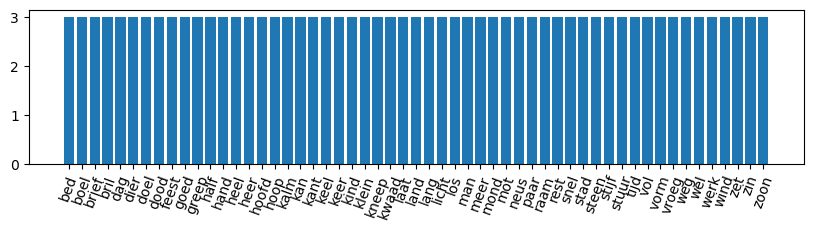

In [7]:
count_dict = defaultdict(int)

for val in val_files:
    count_dict[key_func(val)] += 1

print('Unique words in val set:', len(count_dict.keys()))

plt.figure(figsize=(10,2))
plt.bar(count_dict.keys(), count_dict.values())
plt.xticks(rotation=70)
plt.show()

In [13]:
write_csv(train_files, 'train.csv')
write_csv(val_files, 'val.csv')

## Create CSV files for EEG data

In [18]:
eeg_data_dir = Path('/home/passch/data/hp1_eeg_conditional')

for set in ['train', 'val']:
    files = get_files_in_dir(eeg_data_dir / set, 'wav')
    # Clean the leading path and only keep the filename
    files = ['/'.join(file.split('/')[-2:]) for file in files]
    write_csv(files, f'{set}.csv')

## Create TAR Archive of Data Splits



To create an archive of the datasplits, navigate to `~/data/` directory and run in the shell:

```sh
tar -cvzf datasplits_<date>.tar.gz datasplits/
```

This will avoid having the whole path structure in the tar file, which would be the case if using absolute paths.



The `.tar.gz` file can then be copied to Snellius using:

```sh
scp datasplits_<date>.tar.gz schroderp@snellius.surf.nl:data
```

## Create TAR Archive of VariaNTS Words

In [30]:
import tarfile
print("Creating .tar.gz")
with tarfile.open("VariaNTS_words.tar.gz", "w:gz") as tar:
    for name in tqdm(df.path.values):
        tar.add(name)
print("Done")
print(f"Output size: {os.path.getsize('VariaNTS_words.tar.gz') / 1e6:.2f} MB")

Or, alternatively, again from the command line:

```sh
cd ~/data

tar -cvzf VariaNTS_words_<specname>.tar.gz VariaNTS_words_<specname>/

scp VariaNTS_words_<specname>.tar.gz schroderp@snellius.surf.nl:data
```

## Downsample Audio Data

To match the receptive field size of DiffWave with default configurations, we want to downsample our data from 44.1 kHz to 16 kHz.

In [26]:
input_dir = "/home/passch/data/VariaNTS/SynthSpeakers_VariaNTS_HP_split"

input_files = []
for root, subdirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith('.wav'):
            input_files.append(os.path.join(root,file))

output_dir = "/home/passch/data/VariaNTS/SynthSpeakers_VariaNTS_HP_split_16kHz"
export_SR = 16000
generated_files = []

for i, fn in enumerate(tqdm(input_files)):
    # Read audio
    audio = AudioSegment.from_file(fn, format="wav")

    # # Decrease sampling rate
    audio = audio.set_frame_rate(export_SR)

    output_fn = fn.replace(input_dir, output_dir)

    os.makedirs('/'.join(output_fn.split('/')[:-1]), exist_ok=True)

    audio.export(output_fn, format="wav")

    generated_files.append(output_fn)

100%|██████████| 880/880 [00:11<00:00, 75.02it/s] 


---

In [36]:
df = pd.read_csv( data_dir / 'df_VariaNTS_words.csv')

In [37]:
# We switch to the output directory to avoid the tar utility copying the whole
# path structure into the tar-file
_current_dir = os.getcwd()
os.chdir(data_dir)

In [38]:
dataset_name = 'VariaNTS_words_16kHz'
export_dir = Path(dataset_name)
export_SR = 16000

generated_files = []

for i, row in tqdm(df.iterrows(), total=len(df), desc="Downsampling"):
    # Read audio
    audio = AudioSegment.from_file(row.path, format="wav")

    # Decrease sampling rate
    audio = audio.set_frame_rate(export_SR)

    # Check dir for person, if not exists already
    os.makedirs(export_dir / row.person / f"{row.person}_words", exist_ok=True)

    filename = f"{row.person}/{row.person}_words/{row.word}.wav"

    audio.export(
        export_dir / filename, 
        format="wav"
    )

    generated_files.append(filename)

Downsampling: 100%|██████████| 4800/4800 [00:17<00:00, 280.18it/s]


Create again a tar archive of the files:

In [42]:
import tarfile

with tarfile.open(f"{dataset_name}.tar.gz", "w:gz") as tar:
    for name in tqdm(generated_files, desc='Compressing'):
        tar.add(export_dir / name)

print("Done")
print(f"Output size: {os.path.getsize(f'{dataset_name}.tar.gz') / 1e6:.2f} MB")

Compressing: 100%|██████████| 4800/4800 [00:13<00:00, 353.19it/s]


Done
Output size: 68.18 MB


In [43]:
# Change back to original directory
os.chdir(_current_dir)



The `.tar.gz` file can then be copied to Snellius using:

```sh
scp /home/passch/data/VariaNTS_words_22kHz.tar.gz schroderp@snellius.surf.nl:data
```

## Augmentation

In [35]:
from audiomentations import OneOf, Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, AirAbsorption, PolarityInversion, RoomSimulator
from pydub.effects import normalize as peak_loudness_norm

### Test functioning of augmentations lib

In [534]:
augment = Compose([
    # AddGaussianNoise(min_amplitude=100, max_amplitude=100, p=1.0),
    TimeStretch(min_rate=0.6, max_rate=1.4, p=0.8),
    PitchShift(min_semitones=-1.5, max_semitones=0, p=0.8),
    RoomSimulator(p=0.8),
    AirAbsorption(p=0.8)
    # Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
])

In [535]:
augment.unfreeze_parameters()

In [563]:
import numpy as np

# sr, sample = wavread('/home/passch/data/VariaNTS_words_16kHz/p09/p09_words/bof.wav')
audio = AudioSegment.from_file('/home/passch/data/VariaNTS_words_16kHz_HP_synth/p10/p10_words/club.wav')

sample = np.array(audio.get_array_of_samples(), dtype=np.float32)
# sample = sample.astype(np.float32)
augmented = augment(samples=sample, sample_rate=audio.frame_rate)

In [564]:
ipd.Audio(sample, rate=16000)

In [565]:
ipd.Audio(augmented, rate=16000)

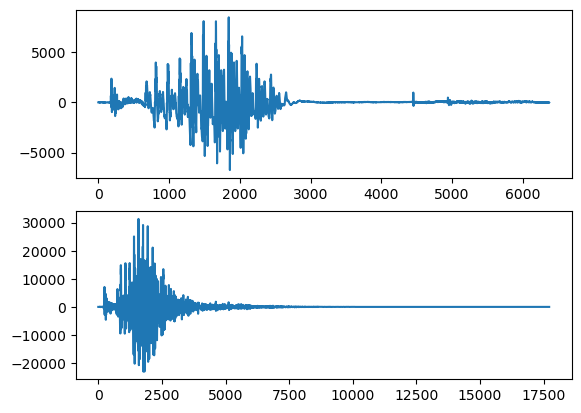

In [566]:
plt.subplot(211)
plt.plot(sample)
plt.subplot(212)
plt.plot(augmented)
plt.show()


### Create aug for existing dataset + existing datasplit

In [42]:
# Which of the actual files on disk to use
# dataset_name = 'VariaNTS_words_16kHz'
dataset_name = 'VariaNTS_words_16kHz_HP_synth'

# Which datasplit to use
# datasplit_name = 'full_80-10-10'
datasplit_name = 'HP_synth_90-10'

# Parent dir where all datasplits are located
datasplits_dir = data_dir / 'datasplits/VariaNTS'

# Where to store the augmented files on disk
output_dir = data_dir / f'VariaNTS/{dataset_name}_aug'

# Where to write the datasplits for the augmented files
datasplits_output_dir = datasplits_dir / f'{datasplit_name}_aug'

Now we define the augmentations we want to apply to each file:

In [43]:
augmentations = {}

n_augs_per_type = 4

# The types of augmentations and their parameters to use. 
base_augs = {
    'timestretch' : (TimeStretch, {'min_rate': 0.6, 'max_rate': 1.4, 'p': 1.0}),
    # pitch shifting upwards makes the audio sound very mechanical, so we only
    # shift downwards
    'pitch' : (PitchShift, {'min_semitones': -1.5, 'max_semitones': 0, 'p': 1.0}),
    'airAbs' : (AirAbsorption, {'p': 1.0}),
    'roomSim' : (RoomSimulator, {'p': 1.0}),
}

# Apply each of the augmentation types `n_augs_per_type` times. On each
# initialization, the parameters will be chosen randomly from the range that
# is specified in their param dict, so we get different ones each time.
# for key, value in base_augs.items():
#     aug_class, aug_params = value
#     for i in range(n_augs_per_type):
#         augmentations[f'{key}{i+1}'] = aug_class(**aug_params)

Get the file names:

In [44]:
# Option 1: Get them from the train split file
# with open(datasplits_dir / datasplit_name / 'train.csv', 'r') as f:
#     files = f.read().split(',')

# Option 2: Get them directly from the directory (if all splits should be augmented)
files = get_files_in_dir(data_dir / 'VariaNTS' / dataset_name, 'wav')

print(len(files))

1760


Now we can define the function that we will use to augment a single file:

In [45]:
def peak_value_norm(samples):
    """
    Normalize peak value of audio array to max value in Int16 range.
    Does not normalize the mean.
    """
    return samples / np.max(np.abs(samples)) * 32767

def augment_file(file):

    os.makedirs(output_dir / '/'.join(file.split('/')[:-1]), exist_ok=True)
    
    _out = [file]

    sr, samples = wavread(data_dir / dataset_name / file)

    # Aug function expects Float32 data type
    samples = samples.astype(np.float32)

    for aug_type, value in base_augs.items():
        aug_class, aug_params = value

        for i in range(n_augs_per_type):
            # Initialize augmentation function
            aug_func = aug_class(**aug_params)

            aug_name = f'{aug_type}{i+1}'

            # Apply new augmentation
            augmented = aug_func(samples=samples, sample_rate=sr)
            augmented = peak_value_norm(augmented)

            # Cast back to Int16 for exporting
            augmented = augmented.astype(np.int16)

            output_filename = f'{file.split(".")[0]}_{aug_name}.wav'

            wavwrite(
                output_dir / output_filename,
                rate = sr,
                data = augmented,
            )

            _out.append(output_filename)

    # An alternative option using the pre-initialised augmentation functions is this code. Beware that this uses the
    # same parameters for each augmentation function. 
    # for aug_name, aug_func in augmentations.items():
    #     augmented = aug_func(samples=samples, sample_rate=sr)
    #     augmented = peak_value_norm(augmented)
    #     # Cast back to Int16 for exporting
    #     augmented = augmented.astype(np.int16)
    #     output_filename = f'{file.split(".")[0]}_{aug_name}.wav'
    #     wavwrite(
    #         output_dir / output_filename,
    #         rate = sr,
    #         data = augmented,
    #     )
    #     _out.append(output_filename)

    # Normalize 
    # (produces error when done with Int16 dtype, so we do it after casting, and
    # also after augmenting, since an augmentation might increase loudness
    # further, causing clipping)
    samples = peak_value_norm(samples)

    # Cast back to Int16 and export
    samples = samples.astype(np.int16)
    wavwrite(output_dir / file, rate = sr, data = samples)

    return _out

And finally run the augmentations using multiprocessing

In [46]:
NUM_PROCESSES = 32

output_filelist = dp.multi_proc(
    iterator = files,
    F = augment_file,
    total = len(files),
    num_processes = NUM_PROCESSES,
    postprocess = 'flatten'
)

100%|██████████| 1760/1760 [01:09<00:00, 25.21it/s]


The multiprocessing gave us back the names of all files that were created. These names are now put into the new .csv file for the train split

In [254]:
# os.makedirs(datasplits_output_dir, exist_ok=True)

# with open(datasplits_output_dir / 'train.csv', 'w') as file:
#     file.write(','.join(output_filelist))

As a last step, we copy over un-augmented files from validation and test set, as well as copy the datasplit files.

In [255]:
for set in ['test', 'val']:
    # Read the file locations using the respective datasplit
    with open(datasplits_dir / datasplit_name / f'{set}.csv', 'r') as f:
        files = f.read().split(',')

    # Copy the files from the original, unaugmented location to the new
    # augmented output dir
    for file in tqdm(files, desc=set):
        shutil.copy(data_dir / dataset_name / file, output_dir / file)

    # Copy the datasplits itself, too
    shutil.copy(datasplits_dir / datasplit_name / f'{set}.csv', datasplits_output_dir / f'{set}.csv')

val: 100%|██████████| 192/192 [00:00<00:00, 239.10it/s]


#### Deprecated code

Another possibility of applying augmentations is to apply a pipeline of augmentations, where each augmentation has a random chance of being applied. This lead to *worse* results though in an example run, which might be due to the fact that for high individual probabilities, most pipelined samples will contain all 4 augmentations, causing the model to try to model the augmentatuions themselves as part of the audio, and not noise to be ignored.

In [ ]:
# Define augmentation pipeline
augment = Compose([
    TimeStretch(min_rate=0.6, max_rate=1.4, p=0.8),
    # pitch shifting upwards makes the audio sound very mechanical, so we only
    # shift downwards
    PitchShift(min_semitones=-1.5, max_semitones=0, p=0.8),
    RoomSimulator(p=0.8),
    AirAbsorption(p=0.8)
])

# Ensure that we sample new parameters on each call
augment.unfreeze_parameters()

### Update the CSV files

Instead of only augmenting the train files given the `train.csv` file, and then overwriting the latter with the augmented filenames, we can create a new CSV file (for each respective set) that adds the performed augmentations:

In [52]:
os.makedirs(datasplits_output_dir, exist_ok=True)

for set in ['train', 'val']:
    print(f'[ INFO ] Processing set: {set.upper()}')
    path = datasplits_dir / datasplit_name / f'{set}.csv'

    with open(path, 'r') as f:
        files = f.readline().split(',')

    new_files = []
    for filepath in files:
        # If anything in the filename needs to be replaced, something like this can be done:
        # filepath = filepath.replace('only55', 'sameval_aug')
        new_files.append(filepath)

        for aug in base_augs.keys():
            for i in range(1, n_augs_per_type + 1):
                aug_filepath = filepath[:-4] + f'_{aug}{i}' + filepath[-4:]
                new_files.append(aug_filepath)

    assert len(new_files) == len(files) * (1 + n_augs_per_type * len(base_augs)) # total number of augmentations

    print('[ INFO ] Asserting files exist')
    for filepath in new_files:
        assert os.path.exists(output_dir / filepath), f'Does not exist: {output_dir / filepath}'

    print('[ INFO ] Creating csv files')
    # with open(datasplits_output_dir / f'{set}_orig.csv', 'w') as file:
    #     file.write(','.join(files))
    # with open(datasplits_output_dir / f'{set}_aug.csv', 'w') as file:
    #     file.write(','.join(new_files))
    
    print('[ INFO ] Done.\n')

[ INFO ] Processing set: TRAIN
[ INFO ] Asserting files exist
[ INFO ] Creating csv files
[ INFO ] Done.

[ INFO ] Processing set: VAL
[ INFO ] Asserting files exist
[ INFO ] Creating csv files
[ INFO ] Done.



## Test augmented audio data

In [105]:
file_path = '/home/passch/data/VariaNTS_words_16kHz_HP_aug/p01/p01_words/blaam.wav'

fr, signal = wavread(file_path)

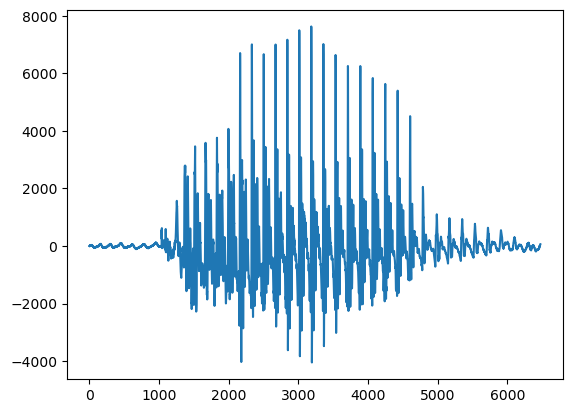

In [106]:
plt.plot(signal)

In [107]:
ipd.Audio(signal, rate=fr)

In [108]:
audio = AudioSegment.from_file(file_path)

In [109]:
audio

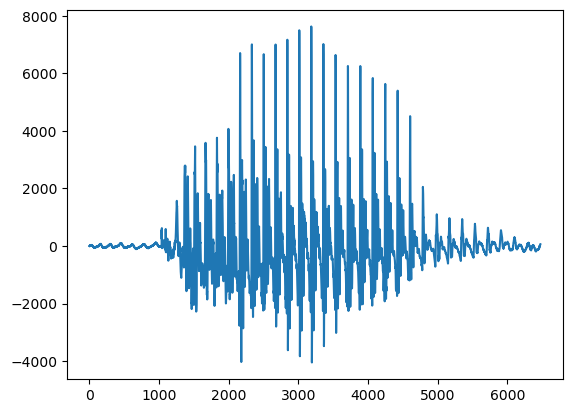

In [110]:
plt.plot(np.array(audio.get_array_of_samples()))

## Combine Synthetic and Real Harry Potter VariaNTS data

The folder can be created manually by dragging and dropping words from the synthetic to the real data folder. Here, we just process the `train.csv` file so that it accomodates the synthetic speakers as well. 

We do not need to do anything to the val and test files, because we only have synthetic voices for the train files right now. This might be suboptimal for evaluating the model in val and test settings, though.

In [94]:
set_path = data_dir / 'datasplits/VariaNTS_Words/HP_70-15-15'
synth_data = data_dir / 'VariaNTS_HarryPotter_TTS_split'

output_set_path = data_dir / 'datasplits/VariaNTS_Words/HP_synth_70-15-15'

In [97]:
# Read real speakers files
with open(set_path / 'train.csv', 'r') as f:
    files = f.read().split(',')

# Extend with synth speakers files
for path, dirs, filenames in os.walk(synth_data):
    if path.endswith('_words'):
        speaker = '/'.join(path.split('/')[-2:])
        files.extend([f'{speaker}/{fn}' for fn in filenames])

# The synth files were added sorted by speaker, so now we sort everything by
# word again
files = sorted(files, key=lambda x: x.split('/')[-1])

# Write to output directory
os.makedirs(output_set_path, exist_ok=True)
with open(output_set_path / 'train.csv', 'w') as f:
    f.write(','.join(files))

# Copy over val and test splits from original data
for set in ['val', 'test']:
    shutil.copy(set_path / f'{set}.csv', output_set_path / f'{set}.csv')

## Make train-val-split for Brain Finetuning data

### Harry Potter Data

First get the names of the Harry Potter brain files

In [40]:
hp_data = '/home/passch/data/HP1_ECoG_conditional/sub-002'

files = [file for file in os.listdir(hp_data) if file.endswith('.wav')]

print(sorted(files))

['bed1.wav', 'bed2.wav', 'boel1.wav', 'brief1.wav', 'brief2.wav', 'brief3.wav', 'brief4.wav', 'brief5.wav', 'bril1.wav', 'bril2.wav', 'dag1.wav', 'dag10.wav', 'dag11.wav', 'dag12.wav', 'dag13.wav', 'dag2.wav', 'dag3.wav', 'dag4.wav', 'dag5.wav', 'dag6.wav', 'dag7.wav', 'dag8.wav', 'dag9.wav', 'dier1.wav', 'doel1.wav', 'dood1.wav', 'dood2.wav', 'dood3.wav', 'feest1.wav', 'goed1.wav', 'goed2.wav', 'goed3.wav', 'goed4.wav', 'goed5.wav', 'goed6.wav', 'goed7.wav', 'goed8.wav', 'goed9.wav', 'greep1.wav', 'greep2.wav', 'half1.wav', 'half2.wav', 'half3.wav', 'half4.wav', 'half5.wav', 'hand1.wav', 'hand2.wav', 'hand3.wav', 'heel1.wav', 'heel2.wav', 'heel3.wav', 'heel4.wav', 'heel5.wav', 'heel6.wav', 'heel7.wav', 'heer1.wav', 'hoofd1.wav', 'hoofd2.wav', 'hoofd3.wav', 'hoofd4.wav', 'hoofd5.wav', 'hoofd6.wav', 'hoofd7.wav', 'hoofd8.wav', 'hoop1.wav', 'hoop2.wav', 'hoop3.wav', 'hoop4.wav', 'kalm1.wav', 'kan1.wav', 'kan2.wav', 'kan3.wav', 'kan4.wav', 'kan5.wav', 'kan6.wav', 'kan7.wav', 'kant1.wav', 

Below are the word counts for this data (words that occur less than 4 times are not shown) for Subject 2:

WORD | wel | dag | goed | paar | hoofd | lang | heel | kan | meer | keer | vroeg | los | brief | half | land | hoop | weg | man | tijd
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
COUNT | 18 | 13 | 9 | 8 | 8 | 8 | 7 | 7 | 7 | 7 | 6 | 6 | 5 | 5 | 5 | 4 | 4 | 4 | 4



Because the data is so unevenly distributed, we take different amounts for the validation set for each word. Below we define the amounts per word:

In [41]:
words_to_choose = {'wel': 5, 'dag': 3, 'goed': 2, 'paar': 1, 'hoofd': 1, 'lang': 1, 'heel': 1, 'kan': 1, 'meer': 1, 'keer': 1}

Note that the data for subject 1 are differently distributed, and that we may choose different amounts per word there.

Then we randomly choose the designated number for each word from the files:

In [42]:
rng = np.random.default_rng(1144)

val_files = []

for (word, count) in words_to_choose.items():
    word_files = [file for file in files if get_word_from_filepath(file) == word]
    val_files.extend(
        rng.choice(word_files, size=count, replace=False)
    )

print(val_files)

['wel12.wav', 'wel17.wav', 'wel5.wav', 'wel7.wav', 'wel1.wav', 'dag2.wav', 'dag4.wav', 'dag9.wav', 'goed8.wav', 'goed4.wav', 'paar1.wav', 'hoofd7.wav', 'lang8.wav', 'heel6.wav', 'kan4.wav', 'meer6.wav', 'keer1.wav']


Now we can write train and validation splits from these:

In [59]:
splits_path = '/home/passch/data/datasplits/HP1_ECoG_conditional/sub-002/'

os.makedirs(splits_path, exist_ok=False)

In [43]:
train_files = [file for file in files if not file in val_files]

In [ ]:
with open(splits_path + 'train.csv', 'w') as f_t, open(splits_path + 'val.csv', 'w') as f_v:
    f_t.write(','.join(train_files))
    f_v.write(','.join(val_files))

### VariaNTS Data

For the brain conditional finetuning experiment that maps Harry Potter to VariaNTS data, we also need to change the train-val-split for the VariaNTS data, such that it fits to the just created Harry Potter split. Of course, we have to reuse the same splits as used in pretraining.

The VariaNTS datasplits were created such that the validation set contains 3 randomly chosen speakers for each word. Since the Harry Potter validation set does not contain every word because of the uneven distribution of words, we can only keep the words in the VariaNTS validation split that are also in the Harry Potter split.

First we load the original VariaNTS datasplits:

In [44]:
# The splits used in both unconditional and class-conditional pretraining runs
vnts_splits_path = '/home/passch/data/datasplits/VariaNTS/HP_synth_aug_90-10/'

with open(vnts_splits_path + 'train.csv', 'r') as f_t, open(vnts_splits_path + 'val.csv', 'r') as f_v:
    vnts_train_files = f_t.read().split(',')
    vnts_val_files = f_v.read().split(',')

len(vnts_train_files), len(vnts_val_files)

(27115, 165)

Then, for both train and validation files, we get the unique words used in the Harry Potter data. 

We have to do this not only for validation, but also for training, because the Harry Potter data may not contain all 55 words (indeed for subject 2, it contains 53 words, while for subject 1 only 43).

In [45]:
hp_train_words = np.unique([get_word_from_filepath(file) for file in train_files])
hp_val_words = np.unique([get_word_from_filepath(file) for file in val_files])

Then we remove all words from the VariaNTS training and validation splits that are not in the Harry Potter ones:

In [46]:
vnts_train_files = [file for file in vnts_train_files if get_word_from_filepath(file) in hp_train_words]
vnts_val_files = [file for file in vnts_val_files if get_word_from_filepath(file) in hp_val_words]

len(vnts_train_files), len(vnts_val_files)

(26129, 30)

Looking at the amount of remaining files, we can see that more files were removed from the validation split than the training split, relatively speaking. This makes sense, as only 2 words have to be removed from training for subject 2, while the Harry Potter validation split only contains a much smaller selection of words to begin with.

In [48]:
vnts_new_splits_path = '/home/passch/data/datasplits/VariaNTS/HP_synth_aug_brain-cond_90-10/'

os.makedirs(vnts_new_splits_path, exist_ok=False)

In [49]:
with open(vnts_new_splits_path + 'train.csv', 'w') as f_t, open(vnts_new_splits_path + 'val.csv', 'w') as f_v:
    f_t.write(','.join(vnts_train_files))
    f_v.write(','.join(vnts_val_files))

We can do the same for the unaugmented train files and augmented val files, for completeness:

In [50]:
with open(vnts_splits_path + 'train_noaug.csv', 'r') as f_t, open(vnts_splits_path + 'val_aug.csv', 'r') as f_v:
    vnts_train_files = f_t.read().split(',')
    vnts_val_files = f_v.read().split(',')

print(len(vnts_train_files), len(vnts_val_files))

vnts_train_files = [file for file in vnts_train_files if get_word_from_filepath(file) in hp_train_words]
vnts_val_files = [file for file in vnts_val_files if get_word_from_filepath(file) in hp_val_words]

print(len(vnts_train_files), len(vnts_val_files))

with open(vnts_new_splits_path + 'train_noaug.csv', 'w') as f_t, open(vnts_new_splits_path + 'val_aug.csv', 'w') as f_v:
    f_t.write(','.join(vnts_train_files))
    f_v.write(','.join(vnts_val_files))

1595 2805
1537 510
